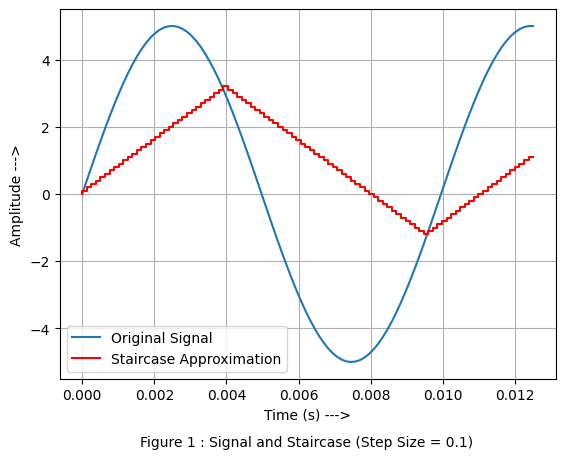

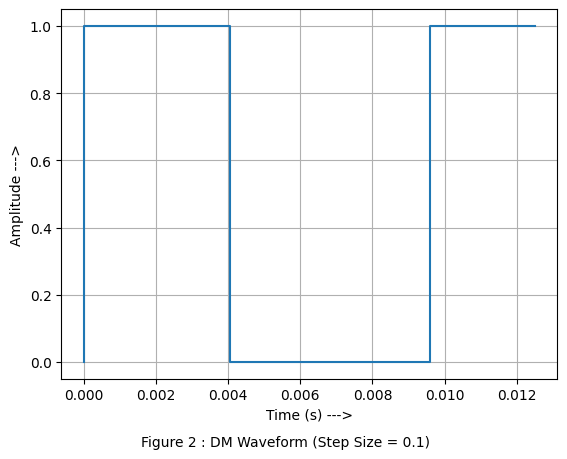

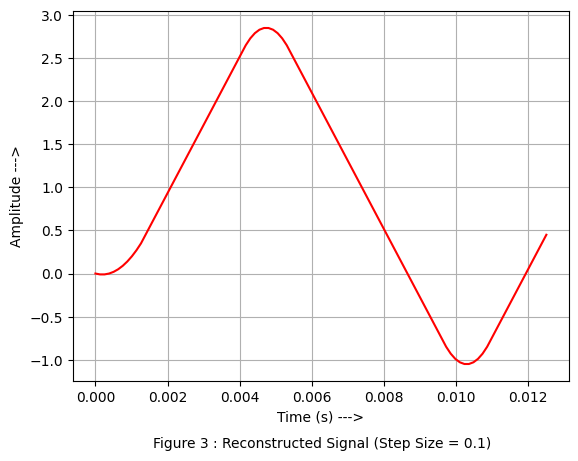

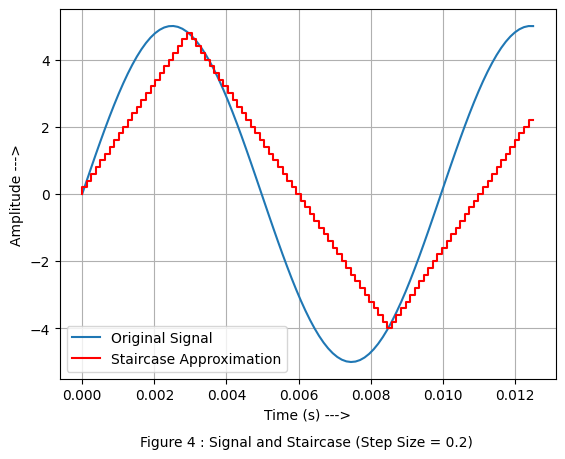

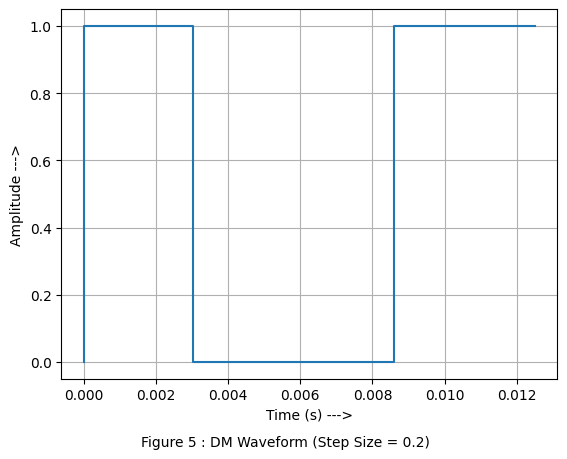

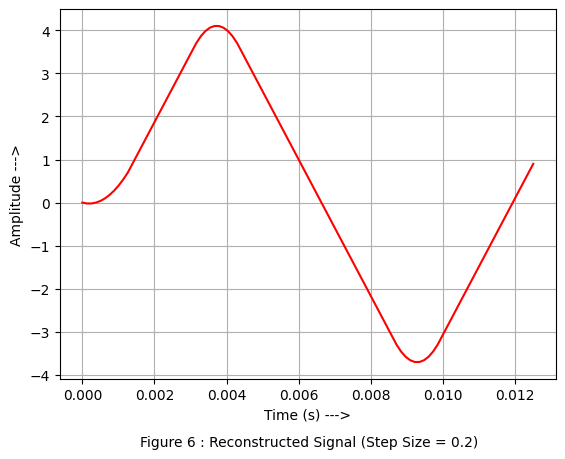

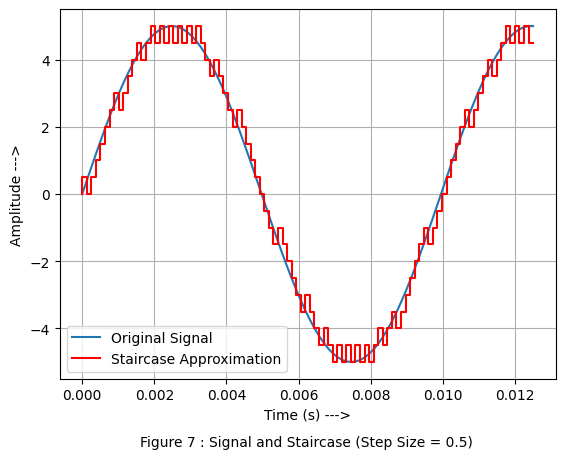

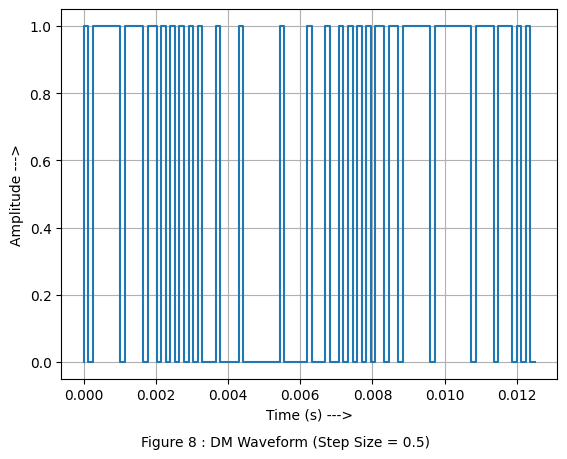

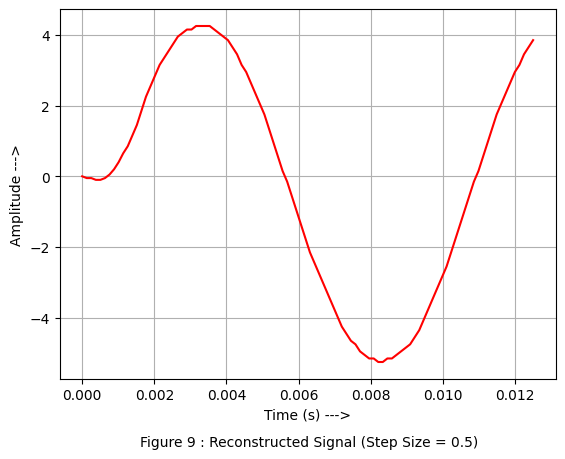

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def modulate(x, step_size):
    y = [0]
    temp = np.zeros_like(x)
    for i in range(len(x) - 1):
        if temp[i] <= x[i]:
            d = 1
            temp[i + 1] = temp[i] + step_size
        else:
            d = 0
            temp[i + 1] = temp[i] - step_size
        y.append(d)
    return y, temp

def decode(y, step_size):
    accumulator = [0]
    for i in range(len(y)):
        if y[i] == 1:
            accumulator.append(accumulator[-1] + step_size)
        else:
            accumulator.append(accumulator[-1] - step_size)
    return accumulator

Ts = 0.0125
samples = 100
t = np.linspace(0, 2*np.pi, samples)
original_signal = 5 * np.sin(2 * np.pi * t / 5)

step_sizes = [0.1, 0.2, 0.5]
count = 1
for i, step_size in enumerate(step_sizes):
    dm_wave, staircase_signal = modulate(original_signal, step_size)
    accumulator = decode(dm_wave, step_size)
    b = np.ones(10)/10
    reconstructed_signal = lfilter(b, 1, accumulator)
    t_s = np.linspace(0, Ts, samples)

    plt.plot(t_s, original_signal, label='Original Signal')
    plt.step(t_s, staircase_signal, 'r', label='Staircase Approximation')
    plt.figtext(0.25,-0.03,f'Figure {count} : Signal and Staircase (Step Size = {step_size})')
    plt.xlabel('Time (s) --->')
    plt.ylabel('Amplitude --->')
    plt.legend()
    plt.grid(True)
    plt.show()
    count = count +1

    plt.step(t_s, dm_wave)
    plt.figtext(0.25,-0.03,f'Figure {count} : DM Waveform (Step Size = {step_size})')
    plt.xlabel('Time (s) --->')
    plt.ylabel('Amplitude --->')
    plt.grid(True)
    plt.show()
    count = count +1

    plt.plot(t_s, reconstructed_signal[:-1], 'r')
    plt.figtext(0.25,-0.03,f'Figure {count} : Reconstructed Signal (Step Size = {step_size})')
    plt.xlabel('Time (s) --->')
    plt.ylabel('Amplitude --->')
    plt.grid(True)
    plt.show()
    count = count +1



